In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# p1s1   p2s2   p7s7
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [2]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r5', 
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p7r1', '20120816_d03_nam32_p7r3','20120816_d03_nam32_p7r5',]
expnames = ['gp1r1', 'gp1r5', 'np1r1', 'np1r3', 'np1r5', 'np7r1', 'np7r3', 'np7r5']
print(expruns[1], '\n', expnames[1])

20120816_d03_gfs05_p1r5 
 gp1r5


In [3]:
ls ..\..\..\..\d03

 Volume in drive D is HDD
 Volume Serial Number is B81D-E3A2

 Directory of D:\d03

02/17/20  05:29 PM    <DIR>          .
02/17/20  05:29 PM    <DIR>          ..
10/29/18  09:32 AM       862,256,324 20120816_d03_gfs05_p1r1.nc
11/12/18  11:00 PM       912,146,772 20120816_d03_gfs05_p1r3.nc
11/12/18  10:53 PM       874,728,724 20120816_d03_gfs05_p1r5.nc
10/30/18  12:51 AM       955,784,812 20120816_d03_gfs05_p2r1.nc
11/12/18  11:11 PM     1,005,675,260 20120816_d03_gfs05_p2r3.nc
11/21/18  02:57 PM       968,257,212 20120816_d03_gfs05_p2r5.nc
11/12/18  03:07 PM       862,256,324 20120816_d03_nam32_p1r1.nc
11/12/18  03:11 PM       912,146,772 20120816_d03_nam32_p1r3.nc
11/12/18  03:15 PM       874,728,724 20120816_d03_nam32_p1r5.nc
11/14/18  11:39 AM       955,784,812 20120816_d03_nam32_p2r1.nc
11/14/18  11:40 AM     1,005,675,260 20120816_d03_nam32_p2r3.nc
11/14/18  11:40 AM       968,257,212 20120816_d03_nam32_p2r5.nc
              12 File(s) 11,157,698,208 bytes
               2 Dir(s)

In [4]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,2,7,12,17,22,27,32,37,42,47]
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

wrf1 = pd.read_pickle('interp/wind_'+expruns[0]+'.pk').iloc[:,idw]
wrf2 = pd.read_pickle('interp/wind_'+expruns[1]+'.pk').iloc[:,idw]
wrf3 = pd.read_pickle('interp/wind_'+expruns[2]+'.pk').iloc[:,idw]
wrf4 = pd.read_pickle('interp/wind_'+expruns[3]+'.pk').iloc[:,idw]
wrf5 = pd.read_pickle('interp/wind_'+expruns[4]+'.pk').iloc[:,idw]
wrf6 = pd.read_pickle('interp/wind_'+expruns[5]+'.pk').iloc[:,idw]
wrf7 = pd.read_pickle('interp/wind_'+expruns[6]+'.pk').iloc[:,idw]
wrf8 = pd.read_pickle('interp/wind_'+expruns[7]+'.pk').iloc[:,idw]

drw1 = pd.read_pickle('interp/wdir_'+expruns[0]+'.pk').iloc[:,idw]
drw2 = pd.read_pickle('interp/wdir_'+expruns[1]+'.pk').iloc[:,idw]
drw3 = pd.read_pickle('interp/wdir_'+expruns[2]+'.pk').iloc[:,idw]
drw4 = pd.read_pickle('interp/wdir_'+expruns[3]+'.pk').iloc[:,idw]
drw5 = pd.read_pickle('interp/wdir_'+expruns[4]+'.pk').iloc[:,idw]
drw6 = pd.read_pickle('interp/wdir_'+expruns[5]+'.pk').iloc[:,idw]
drw7 = pd.read_pickle('interp/wdir_'+expruns[6]+'.pk').iloc[:,idw]
drw8 = pd.read_pickle('interp/wdir_'+expruns[7]+'.pk').iloc[:,idw]

tv1 = pd.read_pickle('interp/tmpv_'+expruns[0]+'.pk').iloc[:,idw]
tv2 = pd.read_pickle('interp/tmpv_'+expruns[1]+'.pk').iloc[:,idw]
tv3 = pd.read_pickle('interp/tmpv_'+expruns[2]+'.pk').iloc[:,idw]
tv4 = pd.read_pickle('interp/tmpv_'+expruns[3]+'.pk').iloc[:,idw]
tv5 = pd.read_pickle('interp/tmpv_'+expruns[4]+'.pk').iloc[:,idw]
tv6 = pd.read_pickle('interp/tmpv_'+expruns[5]+'.pk').iloc[:,idw]
tv7 = pd.read_pickle('interp/tmpv_'+expruns[6]+'.pk').iloc[:,idw]
tv8 = pd.read_pickle('interp/tmpv_'+expruns[7]+'.pk').iloc[:,idw]

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate()
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate()
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate()

sodarw1 = sread_w.iloc[:,ids][t1:t2].interpolate()
sodarw2 = sread_w.iloc[:,ids][t2:t3].interpolate()
sodarw3 = sread_w.iloc[:,ids][t3:t4].interpolate()
sodard1 = sread_d.iloc[:,ids][t1:t2].interpolate()
sodard2 = sread_d.iloc[:,ids][t2:t3].interpolate()
sodard3 = sread_d.iloc[:,ids][t3:t4].interpolate()
sodart1 = sread_t.iloc[:,ids][t1:t2].interpolate()
sodart2 = sread_t.iloc[:,ids][t2:t3].interpolate()
sodart3 = sread_t.iloc[:,ids][t3:t4].interpolate()

In [5]:
def panelPlot(level):
    skey = sodarw1.keys()[level]
    wkey = wrf1.keys()[level]*1000
    fig, axs = plt.subplots(2, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    for axl in range(0,2):
        for axc in range(0,2):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Virtual Temperature')

    ax = axs[0, 0]
    x1 = sodarw1.index
    ax.plot(x1, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t1:t2].iloc[:,level], label=expnames[0])
    ax.plot(wrf3[t1:t2].iloc[:,level], label=expnames[2])
    ax.plot(wrf6[t1:t2].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[0, 1]
    x2 = sodarw2.index
    ax.plot(x2, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t2:t3].iloc[:,level], label=expnames[0])
    ax.plot(wrf3[t2:t3].iloc[:,level], label=expnames[2])
    ax.plot(wrf6[t2:t3].iloc[:,level], label=expnames[5])
    ax.legend();

   
    ax = axs[1, 0]
    ax.plot(x1, sodart1.iloc[:,level], label='sodarTV')
    ax.plot(tv1[t1:t2].iloc[:,level], label=expnames[0])
    ax.plot(tv3[t1:t2].iloc[:,level], label=expnames[2])
    ax.plot(tv6[t1:t2].iloc[:,level], label=expnames[5])
    ax.legend();

    ax = axs[1, 1]
    ax.plot(x2, sodart2.iloc[:,level], label='sodarTV');
    ax.plot(tv1[t2:t3].iloc[:,level], label=expnames[0])
    ax.plot(tv3[t2:t3].iloc[:,level], label=expnames[2])
    ax.plot(tv6[t2:t3].iloc[:,level], label=expnames[5])
    ax.legend();

   
    print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [6]:
def panelPlot2(level):
    skey = sodarw1.keys()[level]
    wkey = wrf1.keys()[level]*1000
    fig, axs = plt.subplots(2, 3, figsize=(15,9))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.15, hspace=0.3)
    for axl in range(0,2):
        for axc in range(0,3):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Wind Speed')
    lw = 0.6
    ax = axs[0, 0]
    ax.set_ylim([0, 12])
    ax.plot(sodarw1.index, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t1:t2].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t1:t2].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t1:t2].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t1:t2].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([0, 12])
    ax.plot(sodarw2.index, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t2:t3].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t2:t3].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t2:t3].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t2:t3].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 2]
    ax.set_ylim([0, 12])
    ax.plot(sodarw3.index, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t3:t4].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t3:t4].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t3:t4].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t3:t4].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[1, 0]
    ax.set_ylim([0, 12])
    ax.plot(sodarw1.index, sodarw1.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t1:t2].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t1:t2].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t1:t2].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t1:t2].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([0, 12])
    ax.plot(sodarw2.index, sodarw2.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t2:t3].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t2:t3].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t2:t3].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t2:t3].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 2]
    ax.set_ylim([0, 12])
    ax.plot(sodarw3.index, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf5[t3:t4].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t3:t4].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t3:t4].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t3:t4].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    plt.suptitle('Wind Speed '+skey);
    # expnames = [1'gp1r1', 2'gp1r5', 3'np1r1', 4'np1r3',
    #             5'np1r5', 6'np7r1', 7'np7r3', 8'np7r5']

    print(level, skey, wkey)
    plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [7]:
def windPanel(level):
    skey = sodarw1.keys()[level]
    wkey = wrf1.keys()[level]*1000
    fig, axs = plt.subplots(1, 3, figsize=(19,5))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('Wind Speed')
    plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=25 )
    plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=25 )
    plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=25 )
    
    lw = 0.7
    ax = axs[0]
    x1 = sodarw1.index
    ax.set_ylim([0, 12])
    ax.plot(x1, sodarw1.iloc[:,level], label='sodarW')
    #ax.plot(wrf1[t1:t2].iloc[:,level], label=expnames[0], linewidth=lw)
    #ax.plot(wrf2[t1:t2].iloc[:,level], label=expnames[1], linewidth=lw)
    #ax.plot(wrf3[t1:t2].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t1:t2].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.plot(wrf5[t1:t2].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t1:t2].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t1:t2].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t1:t2].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1]
    ax.set_ylim([0, 12])
    x2 = sodarw2.index
    ax.plot(x2, sodarw2.iloc[:,level], label='sodarW')
    #ax.plot(wrf1[t2:t3].iloc[:,level], label=expnames[0], linewidth=lw)
    #ax.plot(wrf2[t2:t3].iloc[:,level], label=expnames[1], linewidth=lw)
    #ax.plot(wrf3[t2:t3].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t2:t3].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.plot(wrf5[t2:t3].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t2:t3].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t2:t3].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t2:t3].iloc[:,level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[2]
    ax.set_ylim([0, 12])
    x3 = sodarw3.index
    ax.plot(x3, sodarw3.iloc[:,level], label='sodarW')
    ax.plot(wrf1[t3:t4].iloc[:,level], label=expnames[0], linewidth=lw)
    ax.plot(wrf2[t3:t4].iloc[:,level], label=expnames[1], linewidth=lw)
    ax.plot(wrf3[t3:t4].iloc[:,level], label=expnames[2], linewidth=lw)
    ax.plot(wrf4[t3:t4].iloc[:,level], label=expnames[3], linewidth=lw)
    ax.plot(wrf5[t3:t4].iloc[:,level], label=expnames[4], linewidth=lw)
    ax.plot(wrf6[t3:t4].iloc[:,level], label=expnames[5], linewidth=lw)
    ax.plot(wrf7[t3:t4].iloc[:,level], label=expnames[6], linewidth=lw)
    ax.plot(wrf8[t3:t4].iloc[:,level], label=expnames[7], linewidth=lw)
    plt.suptitle('Wind Speed '+skey);

    ax.legend();
    # expnames = [1'gp1r1', 2'gp1r5', 3'np1r1', 4'np1r3',
    #             5'np1r5', 6'np7r1', 7'np7r3', 8'np7r5']


C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2nu

2 spd_100 100.0


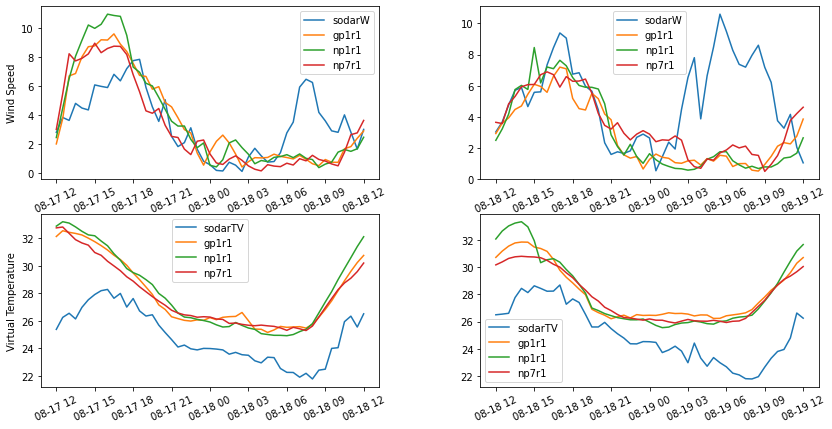

In [8]:
panelPlot(level=2)

In [9]:
def ProfilesPanel1(tt):
    fig, axs = plt.subplots(1, 2, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.2)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Wind Speed')
    axs[1].set_xlabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
 
    ts = wrf2.iloc[tt,:].name
    d = ts.strftime('d%d-%H:%M')
    
    ax = axs[0]
    ax.plot(sodarw.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color='b')
    vdir = np.radians(sodard.iloc[tt,:])
    xx, uu, vv = sodarw.iloc[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1.iloc[tt,:], plot_levs, label=expnames[0], ls='-', color='0.2')
    ax.plot(wrf2.iloc[tt,:], plot_levs, label=expnames[1], ls='--', color='0.2')
    ax.plot(wrf3.iloc[tt,:], plot_levs, label=expnames[2], ls='-.', color='0.2')
    ax.plot(wrf4.iloc[tt,:], plot_levs, label=expnames[3], ls=':', color='0.2')
    ax.plot(wrf5.iloc[tt,:], plot_levs, label=expnames[4], ls='--', color='0.4')      
    ax.plot(wrf6.iloc[tt,:], plot_levs, label=expnames[5], ls='--', color='0.4')
    ax.plot(wrf7.iloc[tt,:], plot_levs, label=expnames[6], ls='-.', color='0.4')
    ax.plot(wrf8.iloc[tt,:], plot_levs, label=expnames[7], ls=':', color='0.4')
    vdir = np.radians(drw1.iloc[tt,:])
    ax.quiver(wrf1.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.2')        
    vdir = np.radians(drw3.iloc[tt,:])
    ax.quiver(wrf3.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.2')        
    vdir = np.radians(drw7.iloc[tt,:])
    ax.quiver(wrf7.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='0.4')        
    ax.legend()

    ax = axs[1]
    ax.plot(sodart.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color='b')        
    ax.plot(tv1.iloc[tt,:], plot_levs, label=expnames[0], ls='-', color='0.2')
    ax.plot(tv2.iloc[tt,:], plot_levs, label=expnames[1], ls='--', color='0.2')
    ax.plot(tv3.iloc[tt,:], plot_levs, label=expnames[2], ls='-.', color='0.2')
    ax.plot(tv4.iloc[tt,:], plot_levs, label=expnames[3], ls=':', color='0.2')
    ax.plot(tv5.iloc[tt,:], plot_levs, label=expnames[4], ls='-', color='0.4')
    ax.plot(tv6.iloc[tt,:], plot_levs, label=expnames[5], ls='--', color='0.4')
    ax.plot(tv7.iloc[tt,:], plot_levs, label=expnames[6], ls='-.', color='0.4')
    ax.plot(tv8.iloc[tt,:], plot_levs, label=expnames[7], ls=':', color='0.4')
    ax.legend()

    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

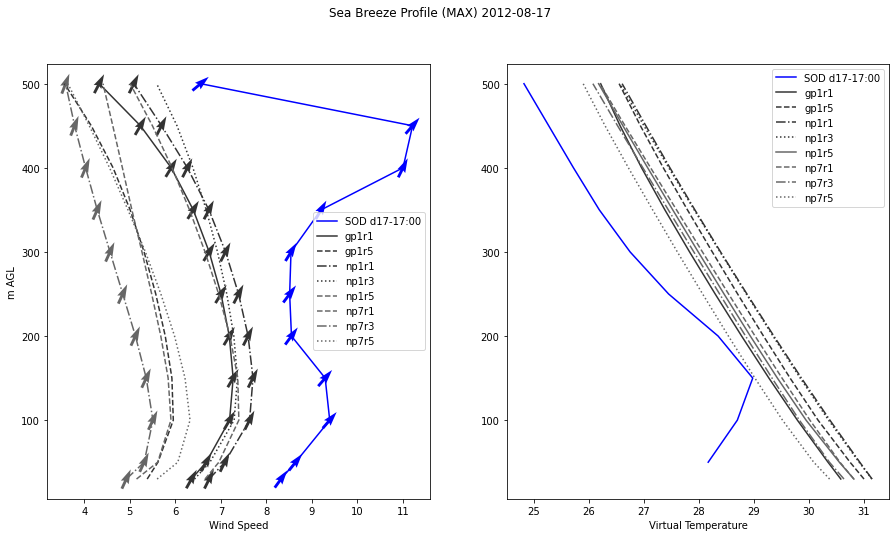

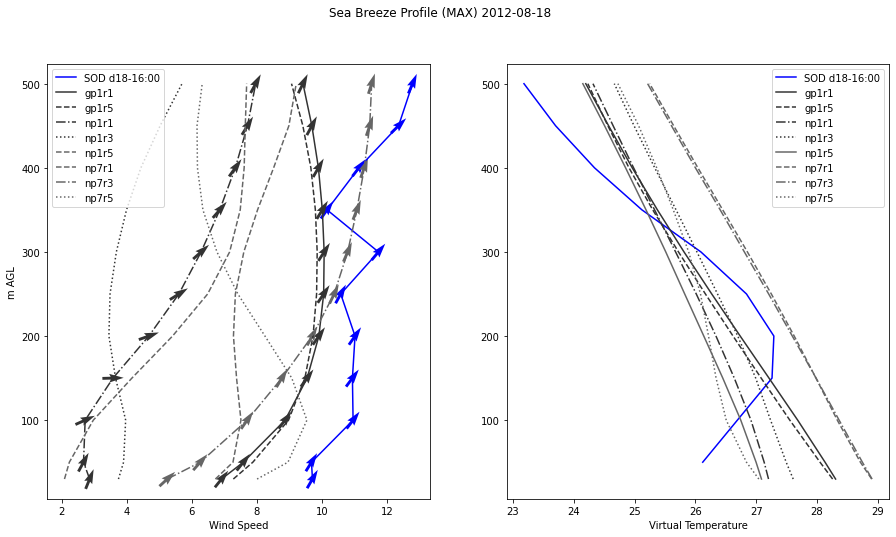

In [10]:
ProfilesPanel1(tt=48+10)
plt.suptitle('Sea Breeze Profile (MAX) 2012-08-17');
plt.savefig('figs/ProfilesPanel1_d17_17h.png', dpi=300)
ProfilesPanel1(tt=96+8)
plt.suptitle('Sea Breeze Profile (MAX) 2012-08-18');
plt.savefig('figs/ProfilesPanel1_d18_16h.png', dpi=300)





In [11]:
def ProfilesPanel2(tstart,tend,deltat,wrfrun):
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    axs[0].set_ylabel('m AGL')
    axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Wind Speed')
    axs[1].set_xlabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
    marker=['x', 'o', '^']
    color=['k','r','b','g']
    i=0
    for tt in np.arange(tstart,tend,deltat):
        ax = axs[0]
        ts = eval('wrfrun.iloc[tt,:].name')
        d = ts.strftime('d%d-%H:%M')
        ax.plot(wrf1.iloc[tt,:], plot_levs, label='WRF '+str(d), ls='dashed', color=color[i])
        #vdir = np.radians(drw1.iloc[tt,:])    
        #ax.quiver(wrf1.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='k')
        
        ax.plot(sodarw.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color=color[i])
        #vdir = np.radians(drw1.iloc[tt,:])    
        #ax.quiver(sodarw.iloc[tt,:], plot_levs, -np.sin(vdir), -np.cos(vdir), pivot='mid', color='k')
        ax.legend()
        
        ax = axs[1]
        ax.plot(tv1.iloc[tt,:], plot_levs, label='WRF '+str(d), ls='dashed', color=color[i])
        ax.plot(sodart.iloc[tt,:], plot_levs, label='SOD '+str(d), ls='solid', color=color[i])        
        ax.legend()
        i=i+1
    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

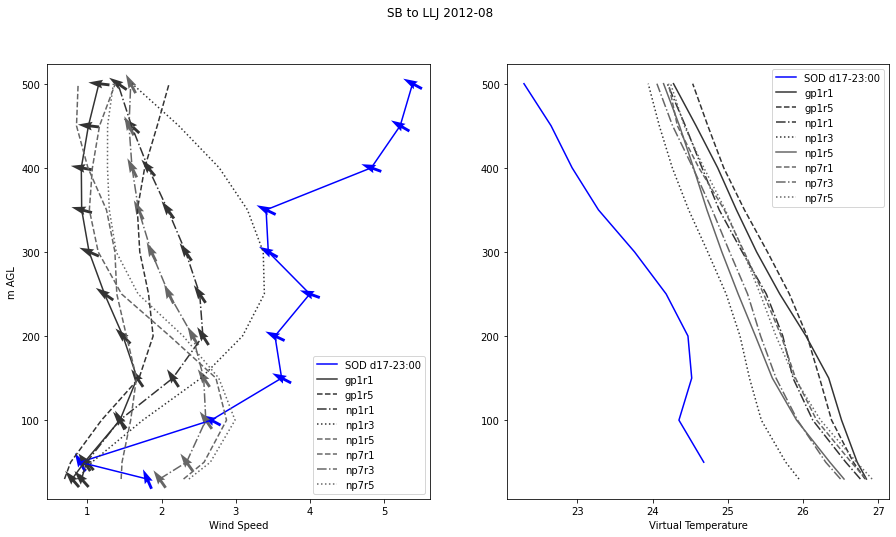

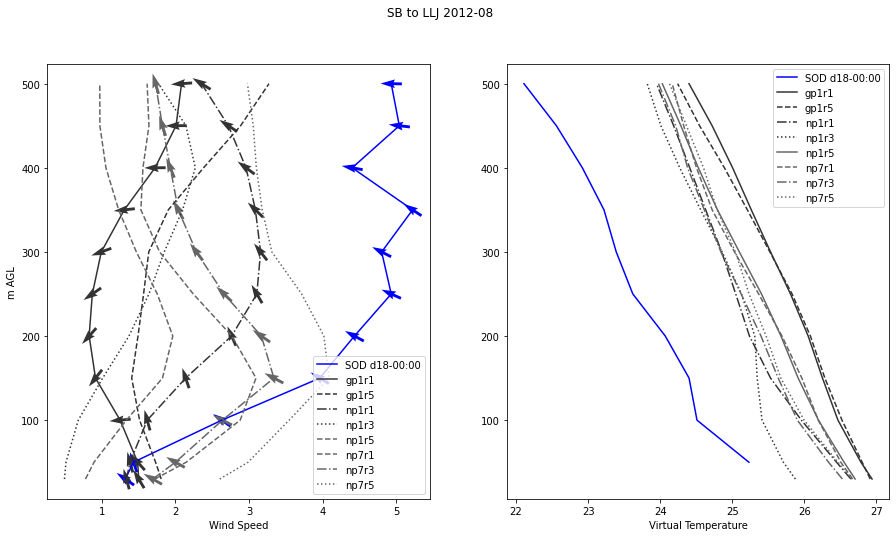

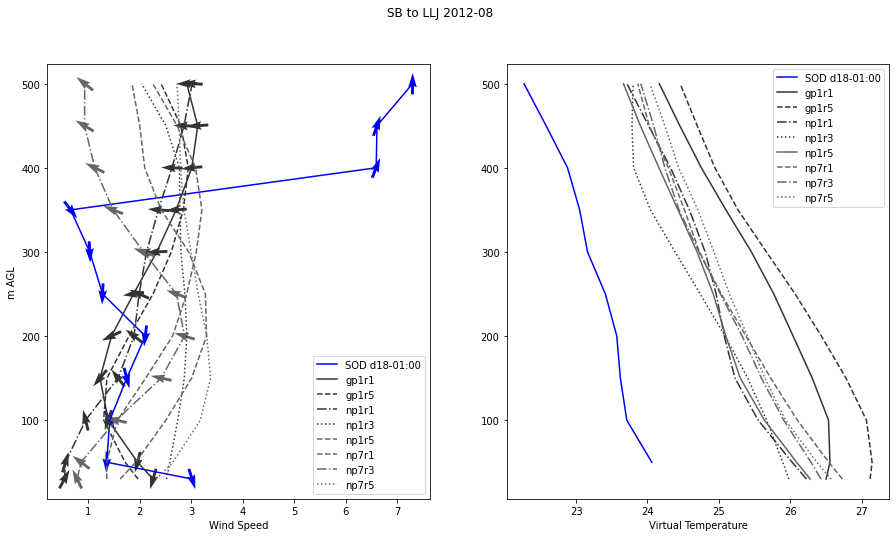

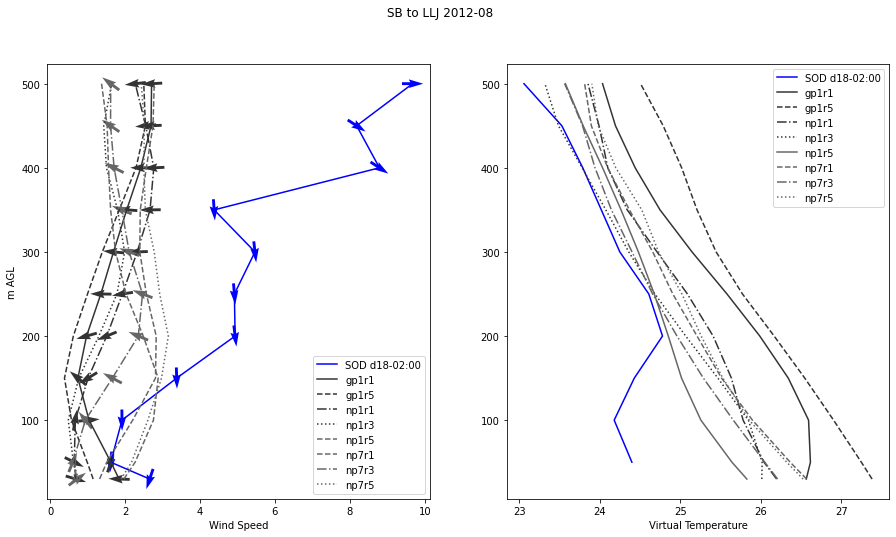

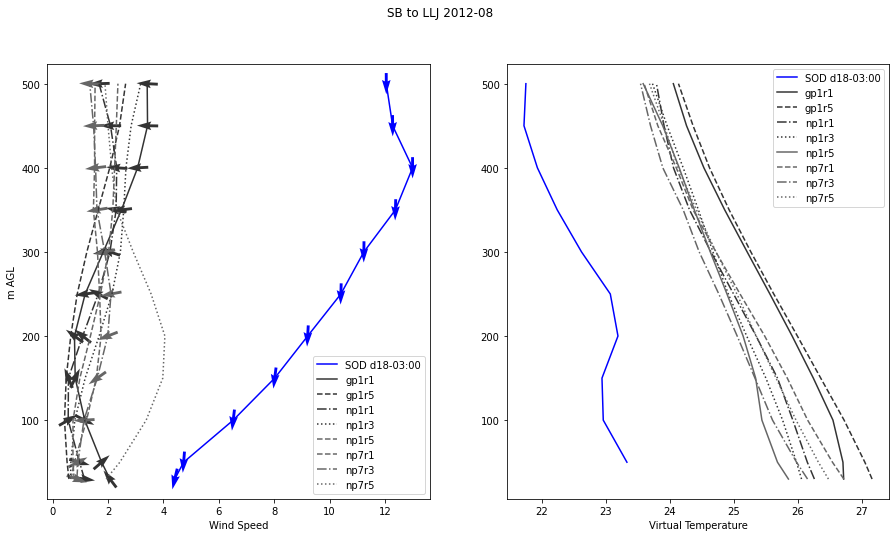

In [12]:
ProfilesPanel1(tt=70)
plt.suptitle('SB to LLJ 2012-08');
plt.savefig('figs/ProfilesPanel1_sbllj_d17_23h.png', dpi=300)

ProfilesPanel1(tt=72)
plt.suptitle('SB to LLJ 2012-08');
plt.savefig('figs/ProfilesPanel1_sbllj_d18_00h.png', dpi=300)

ProfilesPanel1(tt=74)
plt.suptitle('SB to LLJ 2012-08');
plt.savefig('figs/ProfilesPanel1_sbllj_d18_01h.png', dpi=300)

ProfilesPanel1(tt=76)
plt.suptitle('SB to LLJ 2012-08');
plt.savefig('figs/ProfilesPanel1_sbllj_d18_02h.png', dpi=300)

ProfilesPanel1(tt=78)
plt.suptitle('SB to LLJ 2012-08');
plt.savefig('figs/ProfilesPanel1_sbllj_d18_03h.png', dpi=300)


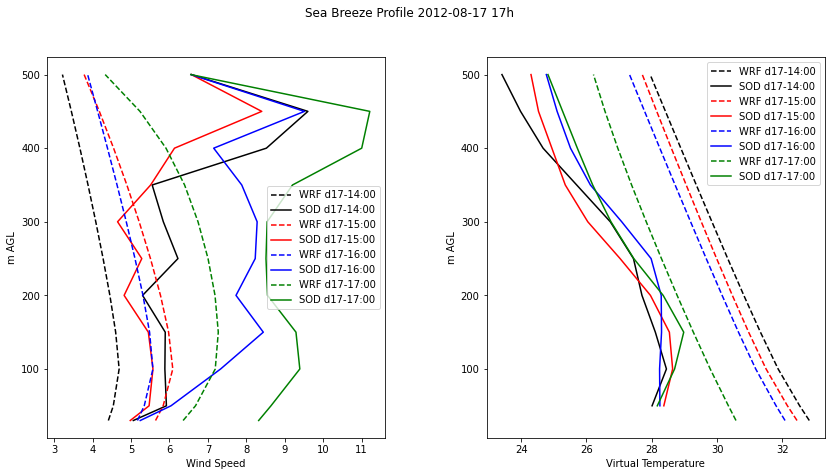

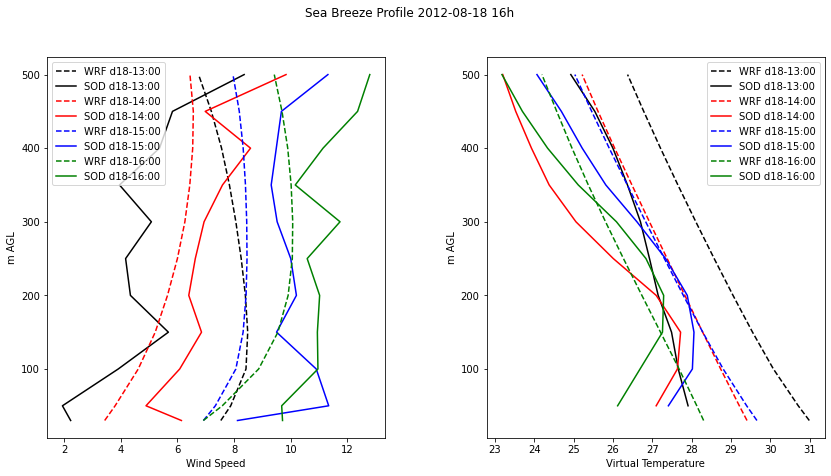

In [13]:
ProfilesPanel2(52,59,2,wrf1)
plt.suptitle('Sea Breeze Profile 2012-08-17 17h');
plt.savefig('figs/Sea Breeze d17_17h_png', dpi=300)
ProfilesPanel2(98,105,2,wrf2)
plt.suptitle('Sea Breeze Profile 2012-08-18 16h');
plt.savefig('figs/Sea Breeze d18_16h_png', dpi=300)

# Por que a 400-500 se vuelve malo el pronostico de SB?

In [14]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel, vertcross, CoordPair, latlon_coords


In [15]:
f = "../../../../d03/20120816_d03_gfs05_p1r1.nc"
ncfile = Dataset(f)
wrftime = getvar(ncfile, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftime10m = pd.to_datetime(wrftime.values)-utc2loc
wrftimeh = pd.to_datetime(wrftime[::3].values)-utc2loc
timelabel = wrftimeh
date1, date2 = wrftimeh[0], wrftimeh[wrftimeh.size-1]
print(wrftimeh.size, date1, date2)

145 2012-08-16 12:00:00 2012-08-19 12:00:00


In [16]:
def hovlat(tt,ll,ztop):
    plt.figure(figsize=(10,4))
   
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    uv = getvar(ncfile, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)[0]
    p = getvar(ncfile, "p", units="hPa", timeidx=tt)
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    
    uhov = getvar(ncfile, "ua", units="m s-1", timeidx=tt)[:ztop,ll,:]
    vhov = getvar(ncfile, "va", units="m s-1", timeidx=tt)[:ztop,ll,:]
    whov = getvar(ncfile, "wa", units="m s-1", timeidx=tt)[:ztop,ll,:]
    zhov = getvar(ncfile, "z", units="m", timeidx=tt)[:ztop,ll,:]
    lncn = uv.coords['XLONG'][ll,:]
    ltcn = uv.coords['XLAT'][ll,:]
    LONS, ZHOV = np.meshgrid(lncn,np.arange(ztop))

    wdhv = np.sqrt(np.power(uhov,2)+np.power(whov,2))
    vmin, vmax = 0, 6
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LONS, zhov, wdhv, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
  
    lonh = uv.coords['XLONG'][ll,:]
    ht_850 = interplevel(z, p, 850)[ll,:]
    ht_900 = interplevel(z, p, 900)[ll,:]
    ht_925 = interplevel(z, p, 925)[ll,:]
    ht_950 = interplevel(z, p, 950)[ll,:]
    plt.plot(lonh, ht_950, color='c', label='950 hPa')
    plt.plot(lonh, ht_900, color='k', label='900 hPa')
    plt.plot(lonh, ht_850, color='y', label='850 hPa')
    plt.legend()

    plt.quiver(LONS, zhov, uhov,whov)
    timestr = uv.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d  %H:%M')
    lats = uv.coords['XLAT'][ll,ll].values
    plt.title('Wind Speed Contours for Sea Breeze\n at lat '+str("%0.2f" %(lats))+'  Valid at '+d);

In [17]:
def hovtlat(tt,ll,ztop):
    from matplotlib import cm
    plt.figure(figsize=(10,4))
   
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    uv = getvar(ncfile, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)[0]
    p = getvar(ncfile, "p", units="hPa", timeidx=tt)
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    
    uhov = getvar(ncfile, "ua", units="m s-1", timeidx=tt)[:ztop,ll,:]
    vhov = getvar(ncfile, "va", units="m s-1", timeidx=tt)[:ztop,ll,:]
    whov = getvar(ncfile, "wa", units="m s-1", timeidx=tt)[:ztop,ll,:]
    zhov = getvar(ncfile, "z", units="m", timeidx=tt)[:ztop,ll,:]
    lncn = uv.coords['XLONG'][ll,:]
    ltcn = uv.coords['XLAT'][ll,:]
    LONS, ZHOV = np.meshgrid(lncn,np.arange(ztop))

    tvhv = tv[:ztop,ll,:]
    vmin, vmax = 18, 34
    levels = np.arange(vmin,vmax,0.5)
    #print(LONS, zhov, wdhv, levels, vmin, vmax)
    plt.contourf(LONS, zhov, tvhv, levels=levels, cmap=cm.jet, vmin=vmin, vmax=vmax)
    plt.colorbar();
  
    lonh = uv.coords['XLONG'][ll,:]
    ht_850 = interplevel(z, p, 850)[ll,:]
    ht_900 = interplevel(z, p, 900)[ll,:]
    ht_925 = interplevel(z, p, 925)[ll,:]
    ht_950 = interplevel(z, p, 950)[ll,:]
    plt.plot(lonh, ht_950, color='c', label='950 hPa')
    plt.plot(lonh, ht_900, color='k', label='900 hPa')
    plt.plot(lonh, ht_850, color='y', label='850 hPa')
    plt.legend()

    plt.quiver(LONS, zhov, uhov,whov)
    timestr = tv.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d  %H:%M')
    lats = uv.coords['XLAT'][ll,ll].values
    plt.title('Virtual Temperature Contours for Sea Breeze\n at Latitude '+str("%0.2f" %(lats))+'  Valid at '+d);

In [18]:
def hovlon(tt,ln,ztop):
    plt.figure(figsize=(10,4))
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    uv = getvar(ncfile, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)[0]
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    p = getvar(ncfile, "z", units="m", timeidx=tt)    
    
    uhov = getvar(ncfile, "ua", units="m s-1", timeidx=tt)[:ztop,:,ln]
    vhov = getvar(ncfile, "va", units="m s-1", timeidx=tt)[:ztop,:,ln]
    whov = getvar(ncfile, "wa", units="m s-1", timeidx=tt)[:ztop,:,ln]
    zhov = getvar(ncfile, "z", units="m", timeidx=tt)[:ztop,:,ln]

    ltcn = uv.coords['XLAT'][:,ln]
    LATS, ZHOV = np.meshgrid(ltcn,np.arange(ztop))

    wdhv = np.sqrt(np.power(vhov,2)+np.power(whov,2))
    vmin, vmax = 1, 6
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LATS, zhov, wdhv, levels=levels, vmin=vmin, vmax=vmax)
    plt.colorbar();
  
    lath = uv.coords['XLAT'][:,ln]
    ht_850 = interplevel(z, p, 850)[:,ln]
    ht_900 = interplevel(z, p, 900)[:,ln]
    ht_925 = interplevel(z, p, 925)[:,ln]
    ht_950 = interplevel(z, p, 950)[:,ln]
    plt.plot(lath, ht_950, color='c', label='950 hPa')
    plt.plot(lath, ht_900, color='k', label='900 hPa')
    plt.plot(lath, ht_850, color='y', label='850 hPa')
    plt.legend()

    plt.quiver(LATS, zhov, vhov,whov)
    timestr = uv.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d  %H:%M')
    lons = uv.coords['XLONG'][ln,ln].values
    plt.gca().invert_xaxis()
    plt.title('Wind Speed Contours for LLJ\n at LON '+str("%0.2f" %(lons))+'  Valid at '+d);

In [19]:
def hovtlon(tt,ln,ztop):
    plt.figure(figsize=(10,4))
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    uv = getvar(ncfile, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)[0]
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    p = getvar(ncfile, "z", units="m", timeidx=tt)    
    
    uhov = getvar(ncfile, "ua", units="m s-1", timeidx=tt)[:ztop,:,ln]
    vhov = getvar(ncfile, "va", units="m s-1", timeidx=tt)[:ztop,:,ln]
    whov = getvar(ncfile, "wa", units="m s-1", timeidx=tt)[:ztop,:,ln]
    zhov = getvar(ncfile, "z", units="m", timeidx=tt)[:ztop,:,ln]
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    p = getvar(ncfile, "z", units="m", timeidx=tt)
    ltcn = uv.coords['XLAT'][:,ln]
    LATS, ZHOV = np.meshgrid(ltcn,np.arange(ztop))

    tvhv = tv[:ztop,ln,:]
    vmin, vmax = 14, 30
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LATS, zhov, tvhv, levels=levels, vmin=vmin, vmax=vmax)
    plt.colorbar();
  
    lath = uv.coords['XLAT'][:,ln]
    ht_850 = interplevel(z, p, 850)[:,ln]
    ht_900 = interplevel(z, p, 900)[:,ln]
    ht_925 = interplevel(z, p, 925)[:,ln]
    ht_950 = interplevel(z, p, 950)[:,ln]
    plt.plot(lath, ht_950, color='c', label='950 hPa')
    plt.plot(lath, ht_900, color='k', label='900 hPa')
    plt.plot(lath, ht_850, color='y', label='850 hPa')
    plt.legend()

    plt.quiver(LATS, zhov, vhov,whov)
    timestr = uv.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d %H:%M')
    lons = uv.coords['XLONG'][ln,ln].values
    plt.gca().invert_xaxis()

    plt.title('Virtual Temp Contours for LLJ\n at LON '+str("%0.2f" %(lons))+'  Valid at '+d);

C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


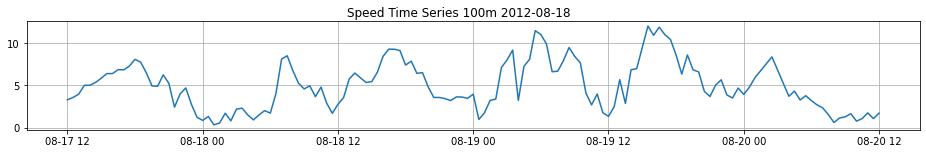

In [20]:
plt.figure(figsize=(16,2))
plt.plot(sodarw.iloc[:,3])
#uu, vv = np.cos(sodard.iloc[::6,3].values), np.sin(sodard.iloc[::6,3].values)
#plt.quiver(uu, vv)
plt.grid()
#sodard.iloc[::6,3]
plt.suptitle('Speed Time Series 100m 2012-08-18');
plt.savefig('figs/TSW_100_png', dpi=300)
#sodarw.head()

In [21]:
def hovSB(tt,angle,ztop):
    plt.figure(figsize=(14,6))    
    #angle = 220
    #ztop = 15
    ua = getvar(ncfile, "ua", units="m s-1", timeidx=tt)
    va = getvar(ncfile, "va", units="m s-1", timeidx=tt)
    wa = getvar(ncfile, "wa", units="m s-1", timeidx=tt)
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    p = getvar(ncfile, "p", units="hPa", timeidx=tt)
    z = getvar(ncfile, "z", units="m", timeidx=tt)

    # Define a pivot point and angle in grid coordinates, with the
    # pivot point being the center of the grid.
    pivot_point = CoordPair(x=22, y=22)

    # Calculate the vertical cross section.  By setting latlon to True, this
    # also calculates the latitude and longitude coordinates along the line
    # and adds them to the metadata to help with plotting labels.
    p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    u_vert = vertcross(ua, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    v_vert = vertcross(va, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    wd_vert= np.sqrt(np.power(u_vert,2)+np.power(v_vert,2))
    z_vert = wd_vert.vertical.values
    i=0
    lats, lons = {}, {}
    for i in range(39):
        lats[i] = u_vert.xy_loc.values[i].lat
        lons[i] = u_vert.xy_loc.values[i].lon
    skip = 1
    lons = np.array(list(lons.values()))[::skip]
    LONS, ZHOV = np.meshgrid(lons, z_vert)
    #print(lons.shape, wd_vert.shape, u_vert.vertical.values.shape)
    vmin, vmax = 0, 14
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LONS, ZHOV, wd_vert, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
    plt.quiver(LONS, ZHOV, u_vert, w_vert, pivot='mid')
    timestr = ua.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d_%H_%M')
    #lats = uv.coords['XLAT'][ll,ll].values
    plt.title('Wind Speed Contours for Sea Breeze\n left to right in SB axis at '+d);
    plt.savefig('figs/Sea Breeze W Axis'+d+'.png', dpi=300)



In [22]:
def hovtSB(tt,angle,ztop):
    plt.figure(figsize=(14,6))    
    #angle = 220
    #ztop = 15
    ua = getvar(ncfile, "ua", units="m s-1", timeidx=tt)
    va = getvar(ncfile, "va", units="m s-1", timeidx=tt)
    wa = getvar(ncfile, "wa", units="m s-1", timeidx=tt)
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    p = getvar(ncfile, "p", units="hPa", timeidx=tt)
    z = getvar(ncfile, "z", units="m", timeidx=tt)

    # Define a pivot point and angle in grid coordinates, with the
    # pivot point being the center of the grid.
    pivot_point = CoordPair(x=22, y=22)

    # Calculate the vertical cross section.  By setting latlon to True, this
    # also calculates the latitude and longitude coordinates along the line
    # and adds them to the metadata to help with plotting labels.
    p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    u_vert = vertcross(ua, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    v_vert = vertcross(va, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    tv_vert = vertcross(tv, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
    z_vert = tv_vert.vertical.values
    i=0
    lats, lons = {}, {}
    for i in range(39):
        lats[i] = tv_vert.xy_loc.values[i].lat
        lons[i] = tv_vert.xy_loc.values[i].lon
    skip = 1
    lons = np.array(list(lons.values()))[::skip]
    #print(lons.shape, tv_vert.shape, z_vert.shape)
    LONS, ZHOV = np.meshgrid(lons, z_vert)
    vmin, vmax = 16, 32
    levels = np.arange(vmin,vmax,0.5)
    plt.contourf(LONS, ZHOV, tv_vert, levels=levels, vmin=vmin, vmax=vmax, cmap='rainbow')
    plt.colorbar();
    plt.quiver(LONS, ZHOV, u_vert, w_vert, pivot='mid')
    timestr = ua.Time.values - np.timedelta64(6,'h')
    ts = pd.to_datetime(str(timestr)) 
    d = ts.strftime('%Y%m%d_%H_%M')
    #lats = uv.coords['XLAT'][ll,ll].values
    plt.title('Wind Speed Contours for Sea Breeze\n left to right in SB axis at '+d);
    plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)




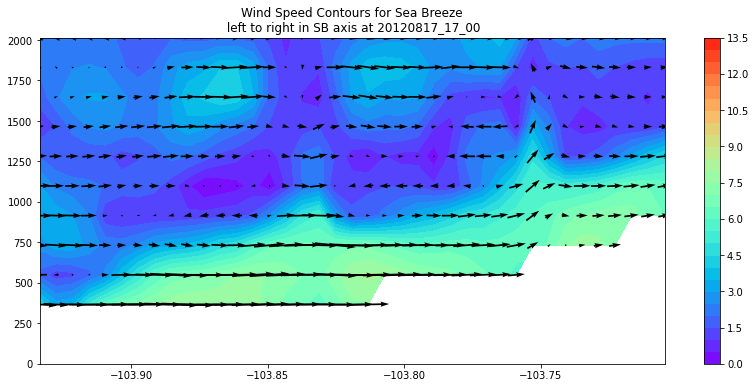

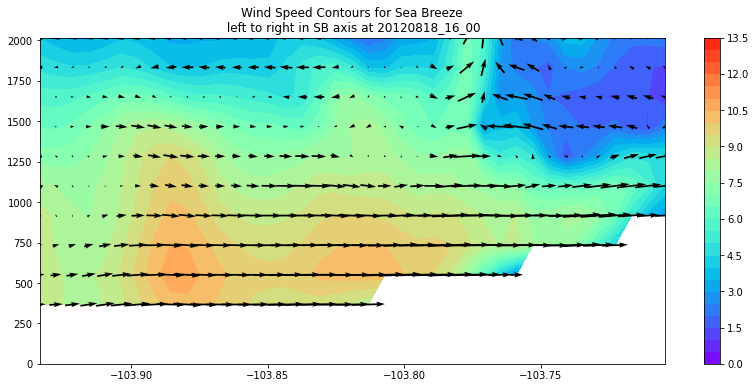

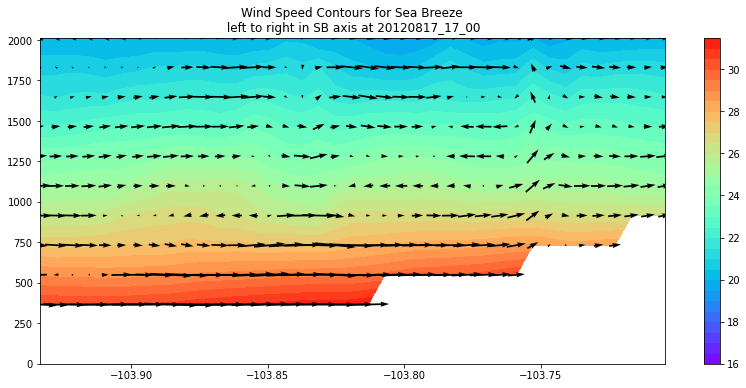

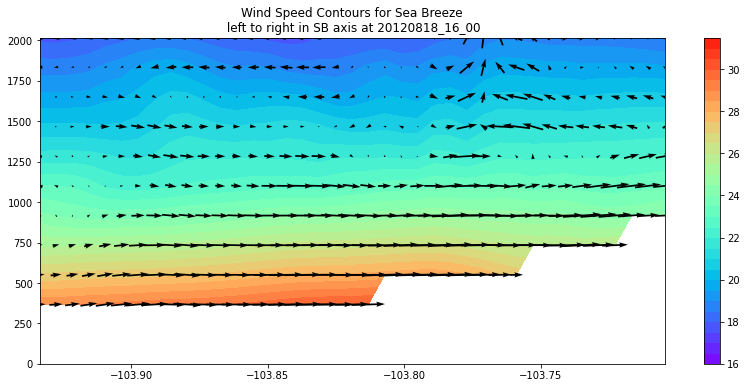

In [23]:
hovSB(tt=3*58,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
hovSB(tt=3*104,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
hovtSB(tt=3*58,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
hovtSB(tt=3*104,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)


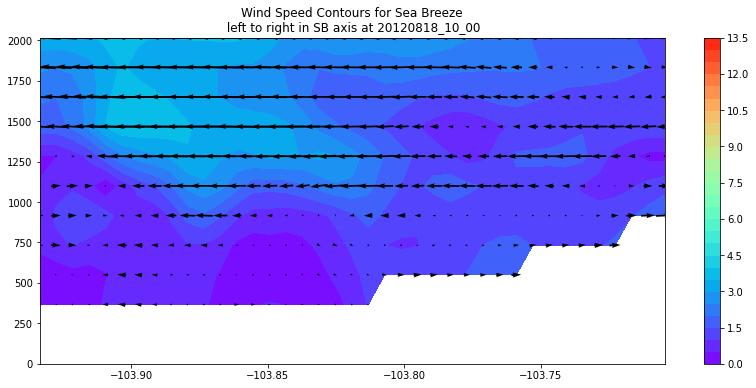

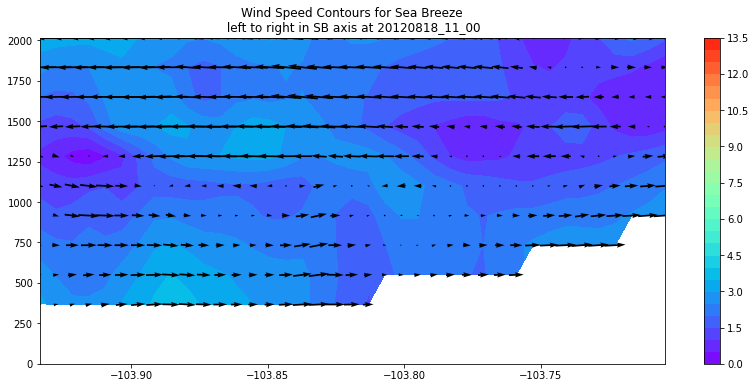

In [24]:
hovSB(tt=3*92,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
hovSB(tt=3*94,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
#hovSB(tt=3*100,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)
#hovSB(tt=3*102,angle=220,ztop=12)
#plt.savefig('figs/Sea Breeze T Axis'+str(d)+'.png', dpi=300)